In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle
import random as rd

In [2]:
def generar_puntos_circunferencia_escotoma(radio, num_puntos, centro=(0, 0)):
    angulos = np.linspace(0,  2*np.pi, num_puntos, endpoint=False)  # Ángulos distribuidos uniformemente
    x = centro[0] + radio * np.cos(angulos)  # Coordenadas X
    y = centro[1] + radio * np.sin(angulos)  # Coordenadas Y
    return x, y

def generar_puntos_circunferencia(radio,lim1, lim2, num_puntos, centro=(0, 0)):
    angulos = np.linspace(lim1,lim2, num_puntos, endpoint=False)  # Ángulos distribuidos uniformemente
    x = centro[0] + radio * np.cos(angulos)  # Coordenadas X
    y = centro[1] + radio * np.sin(angulos)  # Coordenadas Y
    return x, y

# Ambas funciones me devuelven los datos interpretados en grados

# Funcion para pasar de grados a mm en pantalla
def grados_a_mm(valor):
    return valor*5.25

def mm_a_grados(valor):
    return valor/5.25

In [114]:
# Genero el perímetro del escotoma fisiológico
px,py = generar_puntos_circunferencia_escotoma(3,100,centro=(15,0))
Estimulos = [] 
radios = np.arange(7,22,3)
lim1,lim2 = -np.pi/4, np.pi/4
num_puntos = 3
for i in range(len(radios)):
    x,y = generar_puntos_circunferencia(radios[i],lim1,lim2,num_puntos,centro=(0,0))
    num_puntos = num_puntos+2
    for i in range(1,len(x)):
        Estimulos.append([grados_a_mm(x[i]),grados_a_mm(y[i])])
        Estimulos.append([grados_a_mm(-x[i]),grados_a_mm(-y[i])])

In [4]:
Estimulos_1 = [] 
radios = np.arange(2,12,2)
lim1,lim2 = -np.pi/2, np.pi/2
num_puntos = 2
for i in range(len(radios)):
    x,y = generar_puntos_circunferencia(radios[i],lim1,lim2,num_puntos,centro=(0,0))
    num_puntos = num_puntos+1
    for i in range(1,len(x)):
        Estimulos_1.append([x[i],y[i]])
        Estimulos_1.append([-x[i],-y[i]])

In [5]:
# Grafico el patrón para evaluación de errores
#print(len(Estimulos_1))
#grafica_de_patron(Estimulos_1)

### Funciones para generar graficas de patrones y resultados

In [129]:
def grafica_de_patron(Estimulos):
    plt.figure(figsize=(15,10))
    plt.scatter(np.array([coord[0] for coord in Estimulos]),
                np.array([coord[1] for coord in Estimulos]),
                s=50,edgecolors='black',facecolors='none')# Puntos grandes sin relleno
    plt.plot(grados_a_mm(px),grados_a_mm(py),color='blue',label='Escotoma')# Puntos grandes sin relleno
    # Configurar etiquetas y límites
    plt.xlabel('Eje X (grados)');plt.ylabel('Eje Y (grados)')
    plt.xlim(-130,130);plt.ylim(-90,90)
    plt.grid(True,axis='both');plt.legend()
    # Añadir circunferencias de cuadrícula
    #for i in range(0, 30):
    #    circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
    #    plt.gca().add_artist(circulo)
    plt.title('Patrón de estímulos')
    plt.show()

def grafica_resultado(Resultado):
    plt.figure(figsize=(15,10))
    for i in range(len(Resultado)):
        if Resultado[i][-1:][0] == 0:
            plt.scatter([coord[0] for coord in Resultado][i],
                        [coord[1] for coord in Resultado][i],
                        s=50, edgecolors='red', facecolors='red')
        if Resultado[i][-1:][0] == 1:
            plt.scatter([coord[0] for coord in Resultado][i],
                        [coord[1] for coord in Resultado][i],
                        s=50, edgecolors='black',facecolors='black')
        if Resultado[i][-1:][0]=='no valido':
            plt.scatter([coord[0] for coord in Resultado][i],
                        [coord[1] for coord in Resultado][i],
                        s=50, edgecolors='black',facecolors='none')
       # Puntos grandes sin relleno
    plt.plot(grados_a_mm(px),grados_a_mm(py),color='blue',label='Escotoma')# Puntos grandes sin relleno
    # Configurar etiquetas y límites
    plt.xlabel('Eje X (grados)');plt.ylabel('Eje Y (grados)')
    plt.xlim(-130,130);plt.ylim(-90,90)
    plt.grid(True,axis='both');plt.legend()
    # Añadir circunferencias de cuadrícula
    #for i in range(0, 30):
    #    circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
    #    plt.gca().add_artist(circulo)
    plt.title('Resultado')
    # Añadir cuadrícula con más líneas verticales y horizontales
    plt.show()

def resultado(Estimulos,estimulo_no_detectado):
    Base = np.array(Estimulos)
    for i in range(len(estimulo_no_detectado)):
        Estimulos.append(estimulo_no_detectado[i])
    Estimulos = np.array(Estimulos)
    hist1, xedges1, yedges1 = np.histogram2d(Estimulos[:,0], 
                                             Estimulos[:,1], 
                                             bins=[30, 30])
    hist_base,xedges2, yedges2 =  np.histogram2d(Base[:,0], 
                                                 Base[:,1],
                                                 bins=[30, 30])
    
    hist_diferencia = hist1 - hist_base
    plt.figure(figsize=(20,10))
   # Puntos grandes sin relleno
    plt.plot(grados_a_mm(px),grados_a_mm(py),
             color='blue',label='Escotoma')   # Puntos grandes sin relleno
    plt.imshow(hist_diferencia.T, 
               origin='lower', cmap='viridis', 
               extent=[xedges1[0], xedges1[-1],
                       yedges1[0], yedges1[-1]])
    plt.colorbar(label='Frecuencia')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Histograma 2D de los datos')
    plt.show()

#    plt.colorbar(label='Frecuencia')
#    plt.xlim(-130,130);plt.ylim(-90,90)
#    plt.grid(True,axis='both')
    # Añadir circunferencias de cuadrícula
    #for i in range(0, 30):
    #    circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
    #    plt.gca().add_artist(circulo)
#    plt.title('Resultado final')
    # Añadir cuadrícula con más líneas verticales y horizontales
#    plt.xlabel('Valor X');plt.ylabel('Valor Y')
#    plt.show()

### Funcion para simular pruebas

In [121]:
def simulacion_prueba_inicial(Estimulos):
    Resultado, estimulo_no_detectado= [],[]
    estimulo_no_valido = []
    #Escotoma fisiologico
    x_medio,y_medio,desv=grados_a_mm(15),grados_a_mm(0),grados_a_mm(2)
    
    #Escotoma aleatorio9
    x_medio_2,y_medio_2=grados_a_mm(rd.randint(-25,25)),grados_a_mm(rd.randint(-15,15))
    
    for i in range(len([coord[0] for coord in Estimulos])):
        x,y = [coord[0] for coord in Estimulos][i],[coord[1] for coord in Estimulos][i]
        distancia_x = np.linalg.norm(x-x_medio)
        distancia_y = np.linalg.norm(y-y_medio)
        distancia_x_2 = np.linalg.norm(x-x_medio_2)
        distancia_y_2 = np.linalg.norm(y-y_medio_2)
        
        # Analisis para escotoma fisiologico y aleatorio
        if (i%5 == 0):
            resultado = 'no valido'
            Resultado.append([x,y,resultado])
            estimulo_no_valido.append([x,y])
            
        else:            
            if ((distancia_x<desv and distancia_y<desv) 
                or (distancia_x_2<desv and distancia_y_2<desv)):
                
                Resultado.append([x,y,0])
                estimulo_no_detectado.append([x,y])
                
            else:
                if ((distancia_x<=grados_a_mm(3) and distancia_y<=grados_a_mm(3))
                    or (distancia_x_2<=grados_a_mm(3) and distancia_y_2<=grados_a_mm(3))):
                    
                    resultado = rd.randint(0,1)
                    Resultado.append([x,y,resultado])
                    
                    if resultado == 0:
                        estimulo_no_detectado.append([x,y])
                else:
                    Resultado.append([x,y,1])
      
    print('Cantidad de pruebas NO VÁLIDAS:',len(estimulo_no_valido))    
        
    return Resultado,estimulo_no_detectado,x_medio_2,y_medio_2

def simulacion_pruebas_siguientes(patron_nuevo_estimulos,estimulo_no_detectado,x_medio_2,y_medio_2):
    Resultado2 = []
    estimulo_no_valido = []
    for i in range(len([coord[0] for coord in patron_nuevo_estimulos])):
        x,y = [coord[0] for coord in patron_nuevo_estimulos][i],[coord[1] for coord in patron_nuevo_estimulos][i]
        x_medio,y_medio,desv=grados_a_mm(15),grados_a_mm(0),grados_a_mm(2)
        distancia_x = np.linalg.norm(x-x_medio)
        distancia_y = np.linalg.norm(y-y_medio)
        distancia_x_2 = np.linalg.norm(x-x_medio_2)
        distancia_y_2 = np.linalg.norm(y-y_medio_2)
        if (distancia_x<=desv and distancia_y<=desv) or (distancia_x_2<desv and distancia_y_2<desv):
            Resultado2.append([x,y,0])
            estimulo_no_detectado.append([x,y])
        else:
            if (distancia_x<=grados_a_mm(3) and distancia_y<=grados_a_mm(3)) or (distancia_x_2<=grados_a_mm(3) and distancia_y_2<=grados_a_mm(3)):
                resultado =rd.randint(0,1)
                Resultado2.append([x,y,resultado])
                if resultado ==0:
                    estimulo_no_detectado.append([x,y])
            else:
                Resultado2.append([x,y,1]) 
    return (Resultado2,estimulo_no_detectado,x_medio_2,y_medio_2,estimulo_no_valido)

def analisis(Resultado):
    patron_nuevo_estimulos = []
    for i in range(len(Resultado)):
        x , y = [coord[0] for coord in Resultado][i], [coord[1] for coord in Resultado][i]
        if Resultado[i][-1:][0]==0:
            for j in range(len(Resultado)):
                diferencia = [abs([coord[0] for coord in Resultado][j]-x), 
                              abs([coord[1] for coord in Resultado][j]-y)]
                if (np.linalg.norm(diferencia))<grados_a_mm(3.5):
                    patron_nuevo_estimulos.append([[coord[0] for coord in Resultado][j], 
                                                   [coord[1] for coord in Resultado][j]])
        else:
            if  Resultado[i][-1:][0]=='no valido':
                patron_nuevo_estimulos.append([x,y])
    # Convertir la lista a un conjunto de tuplas para eliminar duplicados
    estimulos = list(set(tuple(vector) for vector in patron_nuevo_estimulos))
    # Convertir de nuevo a una lista de listas si es necesario
    estimulos = [list(vector) for vector in estimulos]
    return estimulos

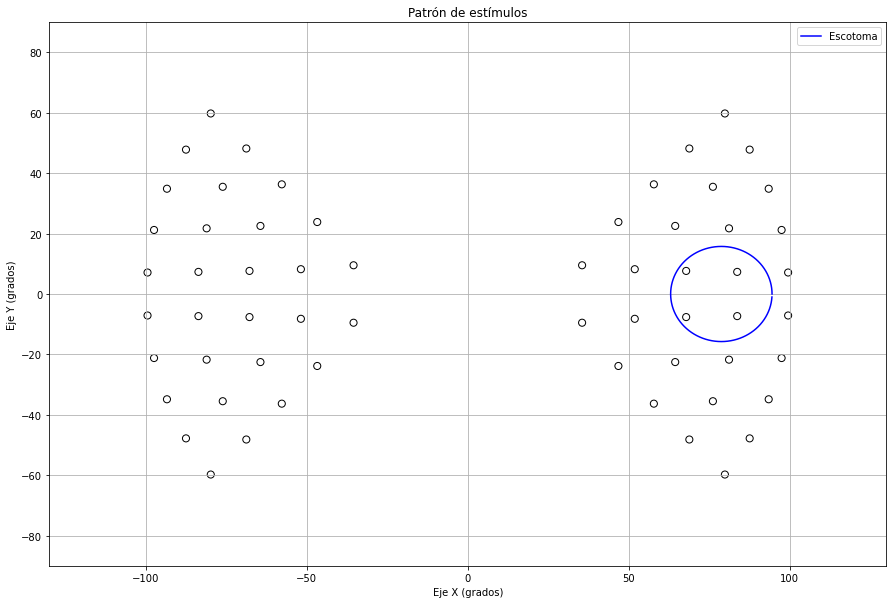

60


In [127]:
# Grafico el patrón
grafica_de_patron(Estimulos)
print(len(Estimulos))

Cantidad de pruebas NO VÁLIDAS: 12
60 2


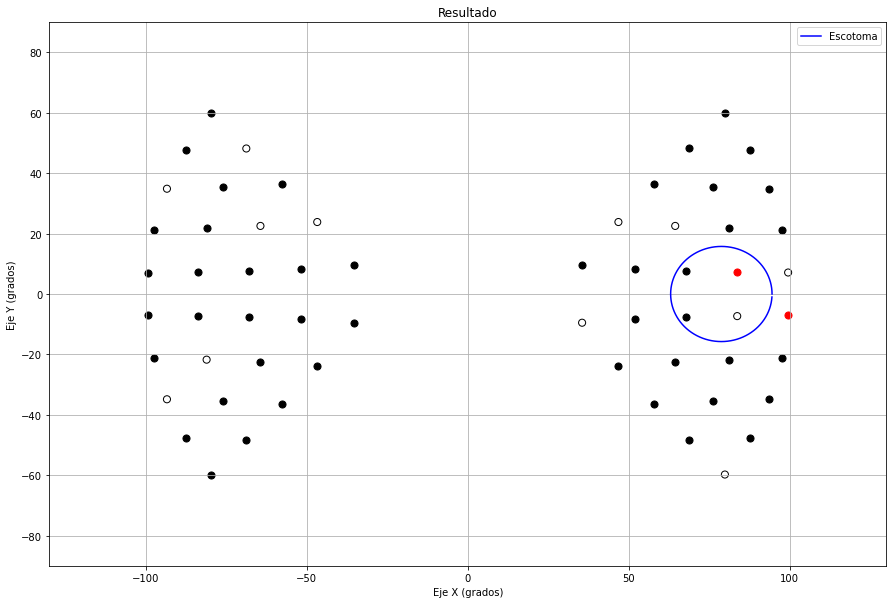

In [130]:
# Simulo una prueba y grafico los resultado
prueba1 = simulacion_prueba_inicial(Estimulos)
Resultado, estimulo_no_detectado = prueba1[0], prueba1[1]
x_medio_2,y_medio_2 = prueba1[2],prueba1[3]
print(len(Resultado),len(estimulo_no_detectado))
grafica_resultado(Resultado)

17


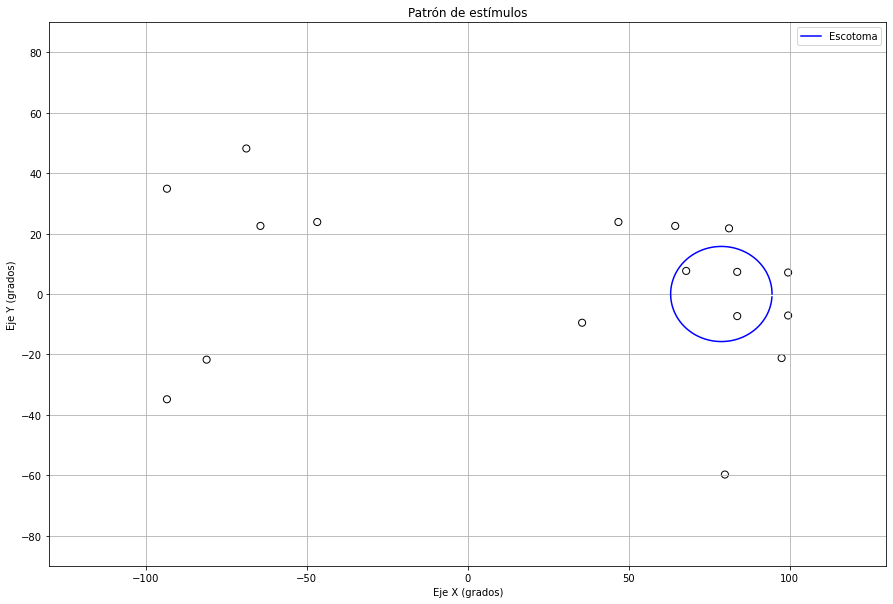

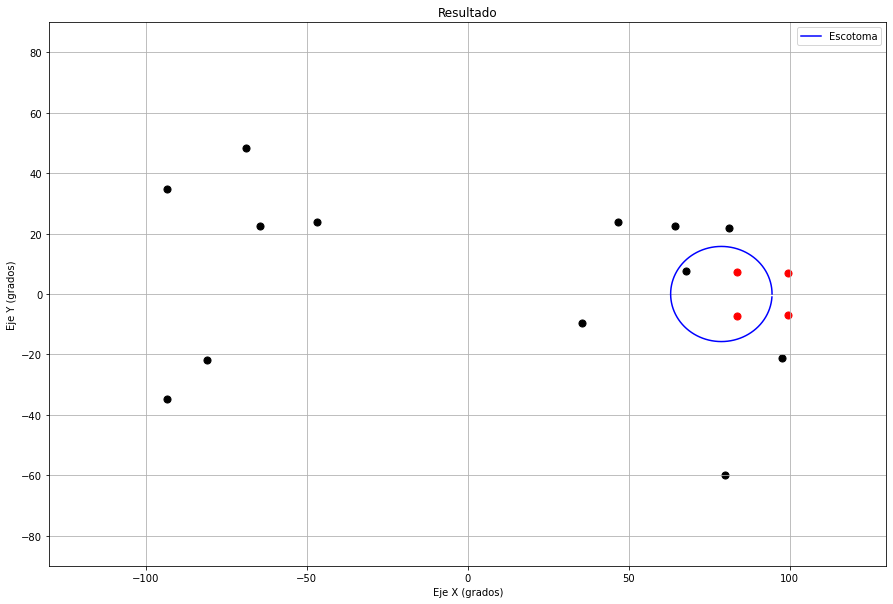

In [131]:
# limpio, genero el nuevo patrón y simulo una segunda prueba
patron_de_estimulos = analisis(Resultado)
print(len(patron_de_estimulos))
grafica_de_patron(patron_de_estimulos)
prueba2 = simulacion_pruebas_siguientes(patron_de_estimulos,estimulo_no_detectado,x_medio_2,y_medio_2)
Resultado2,estimulo_no_detectado = prueba2[0],prueba2[1]
x_medio_2,y_medio_2=prueba2[2],prueba2[3]
grafica_resultado(Resultado2)

7


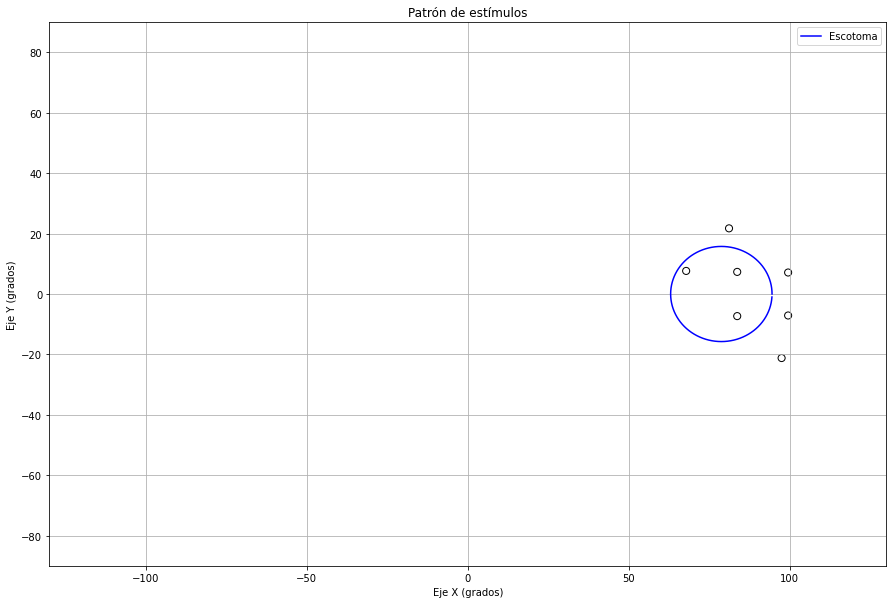

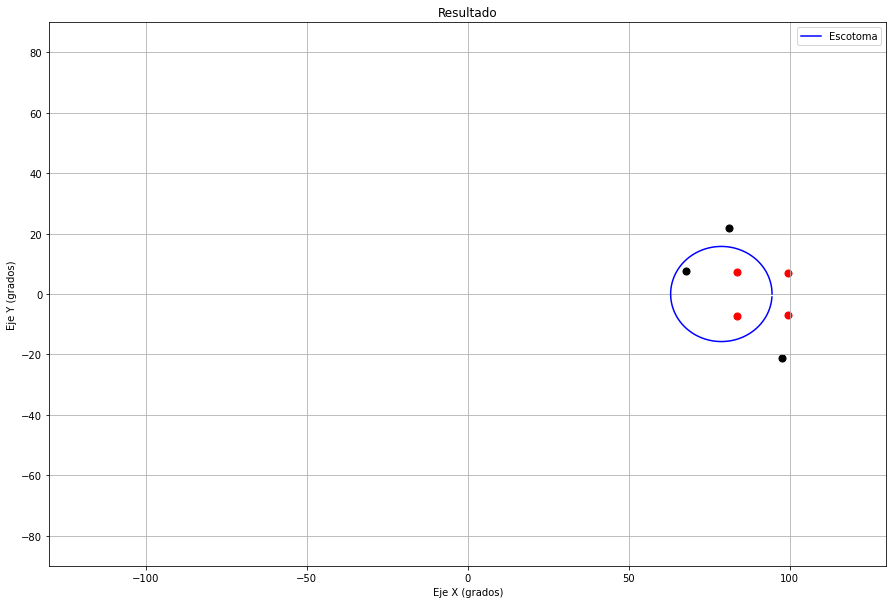

In [132]:
# limpio, genero el nuevo patrón y simulo una tercera prueba
patron_de_estimulos = analisis(Resultado2)
print(len(patron_de_estimulos))
grafica_de_patron(patron_de_estimulos)
prueba3 = simulacion_pruebas_siguientes(patron_de_estimulos,estimulo_no_detectado,x_medio_2,y_medio_2)
Resultado3,estimulo_no_detectado = prueba3[0],prueba3[1]
grafica_resultado(Resultado3)

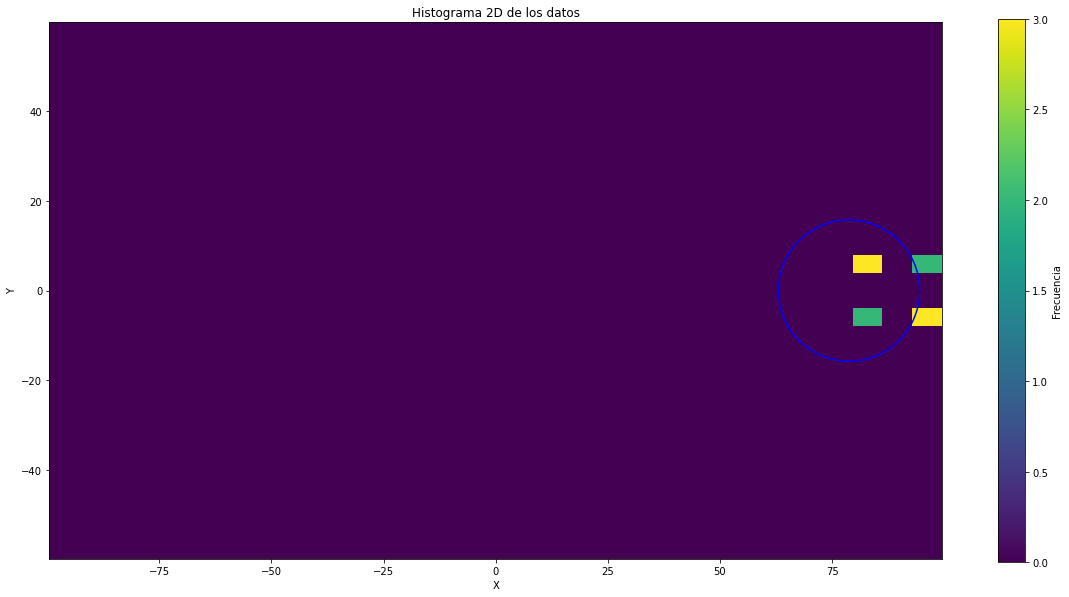

In [133]:
# Creo un mapa de calor del resultado final
resultado(Estimulos,estimulo_no_detectado)

In [12]:
estimulo_no_detectado = [[67.8208583252138, -7.641575494050762], [103.95776705436097, -27.8553997291588], [83.68035463970662, -7.321082390803287], [74.66227947069592, 14.851250763477763], [106.70425320535634, 14.047881437683047], [99.49584843237278, -7.116083524123422], [90.74386629217828, -14.37241647557121], [83.68035463970662, -7.321082390803287], [106.70425320535634, 14.047881437683047], [-74.66227947069592, -14.851250763477763], [74.66227947069592, 14.851250763477763], [90.74386629217828, -14.37241647557121], [103.95776705436097, -27.8553997291588], [-83.68035463970662, 7.321082390803287], [-74.66227947069592, -14.851250763477763], [-90.74386629217828, 14.37241647557121], [90.74386629217828, -14.37241647557121]]

In [13]:
    def Grafica_resultado(estimulo_no_detectado):
        print(estimulo_no_detectado)
        # Genero el perímetro del escotoma fisiológico
        ex, ey = generar_puntos_circunferencia_escotoma(3, 100, centro=(15, 0))
        plt.figure(figsize=(15,10))
        plt.hist2d(mm_a_grados(np.array([coord[0] for coord in estimulo_no_detectado])), mm_a_grados(np.array([coord[1] for coord in estimulo_no_detectado])), bins=[30, 10], cmap='Greys')
        plt.plot(ex,ey)
        plt.colorbar(label='Frecuencia')
        plt.xlim(-25,25);plt.ylim(-17,17)
        plt.grid(True,axis='both')
        # Añadir circunferencias de cuadrícula
        for i in range(0, 30):
            circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
            plt.gca().add_artist(circulo)
        plt.title(f'Resultado final Sujeto 1')
        # Añadir cuadrícula con más líneas verticales y horizontales
        plt.xlabel('Valor X');plt.ylabel('Valor Y')
        plt.show()
                

[[67.8208583252138, -7.641575494050762], [103.95776705436097, -27.8553997291588], [83.68035463970662, -7.321082390803287], [74.66227947069592, 14.851250763477763], [106.70425320535634, 14.047881437683047], [99.49584843237278, -7.116083524123422], [90.74386629217828, -14.37241647557121], [83.68035463970662, -7.321082390803287], [106.70425320535634, 14.047881437683047], [-74.66227947069592, -14.851250763477763], [74.66227947069592, 14.851250763477763], [90.74386629217828, -14.37241647557121], [103.95776705436097, -27.8553997291588], [-83.68035463970662, 7.321082390803287], [-74.66227947069592, -14.851250763477763], [-90.74386629217828, 14.37241647557121], [90.74386629217828, -14.37241647557121]]


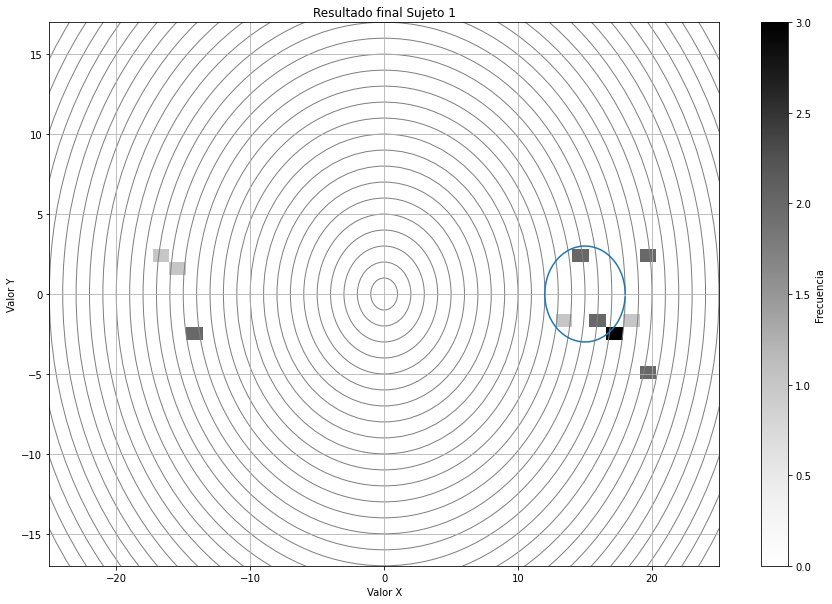

In [14]:
Grafica_resultado(estimulo_no_detectado)

In [15]:
from collections import Counter

In [19]:
# Convertir de nuevo a una lista de listas si es necesario
estimulos = [list(vector) for vector in Estimulos]

In [23]:
# Asegurarse de que los elementos sean tuplas (si fueran listas originalmente)
vector = [tuple(coord) for coord in Estimulos]

# Contar la frecuencia de cada par de coordenadas en el vector
frecuencias = Counter(vector)

In [24]:
frecuencias

Counter({(6.761480784023478, -1.8117333157176456): 1,
         (-6.761480784023478, 1.8117333157176456): 1,
         (6.761480784023478, 1.8117333157176447): 1,
         (-6.761480784023478, -1.8117333157176447): 1,
         (7.852976026345937, -3.252809175103263): 1,
         (-7.852976026345937, 3.252809175103263): 1,
         (8.5, 0.0): 1,
         (-8.5, -0.0): 1,
         (7.852976026345937, 3.252809175103263): 1,
         (-7.852976026345937, -3.252809175103263): 1,
         (8.910065241883679, -4.5399049973954675): 1,
         (-8.910065241883679, 4.5399049973954675): 1,
         (9.876883405951379, -1.5643446504023086): 1,
         (-9.876883405951379, 1.5643446504023086): 1,
         (9.876883405951379, 1.5643446504023086): 1,
         (-9.876883405951379, -1.5643446504023086): 1,
         (8.910065241883679, 4.5399049973954675): 1,
         (-8.910065241883679, -4.5399049973954675): 1,
         (9.959292143521044, -5.75): 1,
         (-9.959292143521044, 5.75): 1,
         (

In [25]:
data = [(x, y, freq-1) for (x, y), freq in frecuencias.items()]

In [26]:
data

[(6.761480784023478, -1.8117333157176456, 0),
 (-6.761480784023478, 1.8117333157176456, 0),
 (6.761480784023478, 1.8117333157176447, 0),
 (-6.761480784023478, -1.8117333157176447, 0),
 (7.852976026345937, -3.252809175103263, 0),
 (-7.852976026345937, 3.252809175103263, 0),
 (8.5, 0.0, 0),
 (-8.5, -0.0, 0),
 (7.852976026345937, 3.252809175103263, 0),
 (-7.852976026345937, -3.252809175103263, 0),
 (8.910065241883679, -4.5399049973954675, 0),
 (-8.910065241883679, 4.5399049973954675, 0),
 (9.876883405951379, -1.5643446504023086, 0),
 (-9.876883405951379, 1.5643446504023086, 0),
 (9.876883405951379, 1.5643446504023086, 0),
 (-9.876883405951379, -1.5643446504023086, 0),
 (8.910065241883679, 4.5399049973954675, 0),
 (-8.910065241883679, -4.5399049973954675, 0),
 (9.959292143521044, -5.75, 0),
 (-9.959292143521044, 5.75, 0),
 (11.108147002324285, -2.976419018678989, 0),
 (-11.108147002324285, 2.976419018678989, 0),
 (11.5, 0.0, 0),
 (-11.5, -0.0, 0),
 (11.108147002324285, 2.976419018678988, 0

In [151]:
import winsound
import time
def beep2():
    frequency = 2000  
    duration = 200  
    for _ in range(3):
        winsound.Beep(frequency, duration)
        time.sleep(1)

In [152]:
beep2()